<a href="https://colab.research.google.com/github/baharv/CNN-NR-IQA/blob/main/CNN_max_min_pooling_simple_global__with_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install patool

     |████████████████████████████████| 81kB 2.7MB/s 


In [ ]:
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/test_dataset.rar", outdir="/content/sample_data")


patool: Extracting /content/drive/MyDrive/test_dataset.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/test_dataset.rar
patool:     with cwd='/content/sample_data'
patool: ... /content/drive/MyDrive/test_dataset.rar extracted to `/content/sample_data'.


'/content/sample_data'

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = cv2.imread('/content/sample_data/test_dataset/test/img10.bmp')

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(x)

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_excel('/content/sample_data/test_dataset/New Microsoft Excel Worksheet.xlsx')

In [ ]:
df['dmos']

In [ ]:
df.shape

(99, 5)

In [ ]:
import os

In [ ]:
f = os.listdir('/content/sample_data/test_dataset/test')

In [ ]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]


In [ ]:
name = []
for x in f:
  #print(x.split('.')[0])
  name.append(x.split('.')[0])

In [ ]:

f.sort(key=natural_keys)
print(f)

['img2.bmp', 'img3.bmp', 'img4.bmp', 'img5.bmp', 'img6.bmp', 'img7.bmp', 'img8.bmp', 'img10.bmp', 'img12.bmp', 'img13.bmp', 'img14.bmp', 'img15.bmp', 'img17.bmp', 'img18.bmp', 'img19.bmp', 'img21.bmp', 'img23.bmp', 'img26.bmp', 'img27.bmp', 'img28.bmp', 'img29.bmp', 'img30.bmp', 'img31.bmp', 'img32.bmp', 'img33.bmp', 'img34.bmp', 'img37.bmp', 'img38.bmp', 'img39.bmp', 'img40.bmp', 'img41.bmp', 'img42.bmp', 'img43.bmp', 'img44.bmp', 'img45.bmp', 'img46.bmp', 'img47.bmp', 'img48.bmp', 'img49.bmp', 'img51.bmp', 'img52.bmp', 'img53.bmp', 'img55.bmp', 'img56.bmp', 'img58.bmp', 'img59.bmp', 'img60.bmp', 'img61.bmp', 'img62.bmp', 'img63.bmp', 'img65.bmp', 'img68.bmp', 'img69.bmp', 'img71.bmp', 'img74.bmp', 'img75.bmp', 'img77.bmp', 'img78.bmp', 'img79.bmp', 'img80.bmp', 'img81.bmp', 'img82.bmp', 'img83.bmp', 'img85.bmp', 'img86.bmp', 'img88.bmp', 'img90.bmp', 'img91.bmp', 'img92.bmp', 'img94.bmp', 'img96.bmp', 'img98.bmp', 'img99.bmp', 'img101.bmp', 'img102.bmp', 'img103.bmp', 'img104.bmp', '

In [ ]:
label = df['dmos']

In [ ]:
label

In [ ]:
data=[]
for x in f:
  path = os.path.join('/content/sample_data/test_dataset/test',x)
  input = cv2.imread(path)
  informaion = cv2.resize(input, (224, 224))
  data.append(informaion)
total_data = np.array(data)

In [ ]:
total_data.shape

(99, 224, 224, 3)

In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
import keras
import keras
from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense, Dropout,Conv2D,MaxPooling2D,Activation,Flatten,AveragePooling2D,GlobalMaxPooling2D,Add
from tensorflow.python.keras.models import Sequential
from keras import layers

In [ ]:
total_data = total_data.astype('float32')

In [ ]:
from keras import backend as K

In [ ]:
def min_pool2d(x):

    max_val = K.max(x) + 1 # we gonna replace all zeros with that value
    # replace all 0s with very high numbers
    is_zero = max_val * K.cast(K.equal(x,0), dtype=K.floatx())
    x = is_zero + x

    # execute pooling with 0s being replaced by a high number
    min_x = -K.pool2d(-x, pool_size=(2, 2),padding='valid',strides=(2,2))

    # depending on the value we either substract the zero replacement or not
    is_result_zero = max_val * K.cast(K.equal(min_x, max_val), dtype=K.floatx()) 
    min_x = min_x - is_result_zero

    return min_x # concatenate on channel

In [ ]:
def global_min_pool2d(x):

    max_val = K.max(x) + 1 # we gonna replace all zeros with that value
    # replace all 0s with very high numbers
    is_zero = max_val * K.cast(K.equal(x,0), dtype=K.floatx())
    x = is_zero + x

    # execute pooling with 0s being replaced by a high number
    min_x = -K.pool2d(-x, pool_size=(x.shape[1], x.shape[2]))

    # depending on the value we either substract the zero replacement or not
    is_result_zero = max_val * K.cast(K.equal(min_x, max_val), dtype=K.floatx()) 
    min_x = min_x - is_result_zero

    return min_x # concatenate on channel

In [ ]:
import tensorflow as tf
tf.keras.backend.set_floatx('float32')
input_A = keras.layers.Input(shape=[224,224,3])
y=Conv2D(1, (3),data_format='channels_last',activation='relu',padding='valid')(total_data)
y2=MaxPooling2D((2,2),padding='valid',strides=(2,2))(y)
y1 = min_pool2d(y)
y3 = keras.layers.Concatenate(axis=-1)([y1, y2])
data=Flatten()(y3)
data.shape

TensorShape([99, 24642])

In [ ]:
import tensorflow as tf
tf.keras.backend.set_floatx('float32')
input_A = keras.layers.Input(shape=[224,224,3])
y=Conv2D(1, (3),data_format='channels_last',activation='relu',padding='valid')(total_data)
y2= GlobalMaxPooling2D()(y)
y1 = global_min_pool2d(y)
y1_1 = Flatten()(y1)
print(y1_1.shape)
print(y2.shape)
y3 = keras.layers.Concatenate()([y1_1, y2])
data_max=Flatten()(y3)
data_max.shape

(99, 1)
(99, 1)


TensorShape([99, 2])

In [ ]:
label = np.array(label)
label = label.reshape(label.shape[0],1)
label = label.ravel()

In [ ]:
data =np.array(data)
data = data.astype('float32')

In [ ]:
data_max = np.array(data_max)
data_max = data_max.astype('float32')

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = data[0:80],data[80:]
target_train,target_test = label[0:80],label[80:]
print(target_train.shape,target_test.shape)
print(test_set.shape)
print(train_set.shape)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set,target_train,target_tests = train_test_split(data_max,label, test_size=0.3, random_state=21)
print(train_set.shape,target_train.shape, test_set.shape,target_tests.shape)

(69, 2) (69,) (30, 2) (30,)


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [i for i in np.linspace(0.1,1,100)], 
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(train_set, target_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.014, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] .................. C=0.1, kernel=rbf, score=-0.314, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] .................. C=0.1, kernel=rbf, score=-0.289, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] .................. C=0.1, kernel=rbf, score=-0.199, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] .................. C=0.1, kernel=rbf, score=-0.097, total=   0.0s
[CV] C=0.1090909090909091, kernel=rbf ................................
[CV] .... C=0.1090909090909091, kernel=rbf, score=0.015, total=   0.0s
[CV] C=0.1090909090909091, kernel=rbf ................................
[CV] ... C=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ... C=0.2181818181818182, kernel=rbf, score=-0.090, total=   0.0s
[CV] C=0.22727272727272727, kernel=rbf ...............................
[CV] ... C=0.22727272727272727, kernel=rbf, score=0.025, total=   0.0s
[CV] C=0.22727272727272727, kernel=rbf ...............................
[CV] .. C=0.22727272727272727, kernel=rbf, score=-0.282, total=   0.0s
[CV] C=0.22727272727272727, kernel=rbf ...............................
[CV] .. C=0.22727272727272727, kernel=rbf, score=-0.274, total=   0.0s
[CV] C=0.22727272727272727, kernel=rbf ...............................
[CV] .. C=0.22727272727272727, kernel=rbf, score=-0.192, total=   0.0s
[CV] C=0.22727272727272727, kernel=rbf ...............................
[CV] .. C=0.22727272727272727, kernel=rbf, score=-0.090, total=   0.0s
[CV] C=0.23636363636363636, kernel=rbf ...............................
[CV] ... C=0.23636363636363636, kernel=rbf, score=0.026, total=   0.0s
[CV] C=0.23636363636363636, kernel=rbf ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.1090909090909091, 0.1181818181818182,
                               0.1272727272727273, 0.13636363636363635,
                               0.14545454545454545, 0.15454545454545454,
                               0...
                               0.24545454545454545, 0.2545454545454545,
                               0.26363636363636367, 0.2727272727272727,
                               0.28181818181818186, 0.2909090909090909, 0.3,
                               0.3090909090909091, 0.3181818181818182,
                               0.32727272727272727, 0.33636363636363636,
                               0.345454545454

In [ ]:
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1.0, 'kernel': 'rbf'}
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


median error 17.648942316821042
Mean squared error 335.01261136939513
Mean absolute error 16.015298591737334


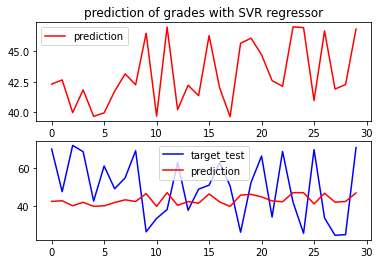

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
pred = grid.predict(test_set)
print("median error",median_absolute_error(target_tests, pred))
print("Mean squared error",mean_squared_error(target_tests, pred))
print("Mean absolute error",mean_absolute_error(target_tests, pred))

plt.subplot(2, 1, 1)
plt.title('prediction of grades with SVR regressor')
plt.plot(pred,color = 'red', label = 'prediction')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(target_tests,color = 'blue', label = 'target_test')
plt.plot(pred,color = 'red', label = 'prediction')
plt.legend()
plt.show()

i 0.01
j 0.01
median error 30.019597987689366
Mean squared error 1168.940594156238
Mean absolute error 29.836221588521997


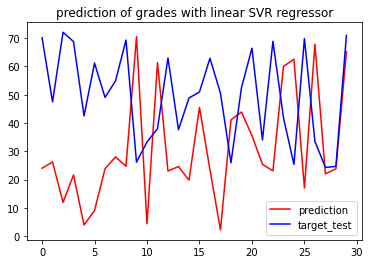

i 0.011414141414141415
j 0.011414141414141415
median error 29.956530806717844
Mean squared error 1158.744394257217
Mean absolute error 29.70294099920404


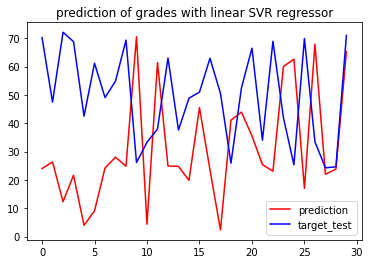

i 0.012828282828282828
j 0.012828282828282828
median error 29.893463625746318
Mean squared error 1148.8322581432444
Mean absolute error 29.569660409886072


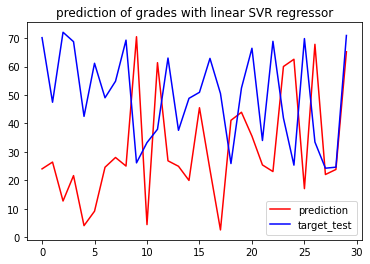

i 0.014242424242424242
j 0.014242424242424242
median error 29.854626790513056
Mean squared error 1139.2041858143205
Mean absolute error 29.436379820568106


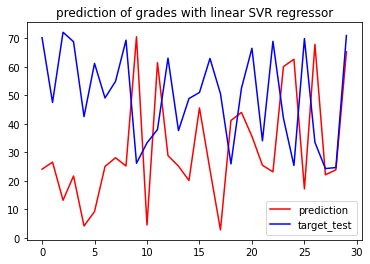

i 0.015656565656565657
j 0.015656565656565657
median error 29.822939006665443
Mean squared error 1129.8601772704446
Mean absolute error 29.303099231250144


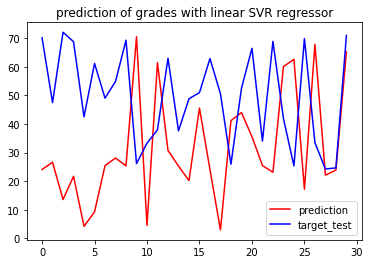

i 0.01707070707070707
j 0.01707070707070707
median error 29.523992260467857
Mean squared error 1120.8002325116177
Mean absolute error 29.169818641932185


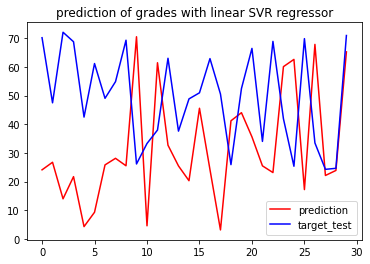

i 0.018484848484848486
j 0.018484848484848486
median error 28.550498382632604
Mean squared error 1112.024351537839
Mean absolute error 29.03653805261422


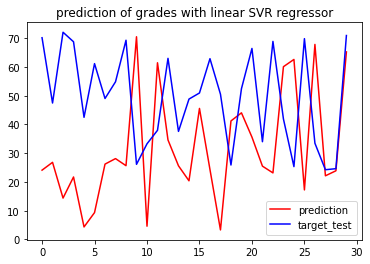

i 0.019898989898989895
j 0.019898989898989895
median error 28.482405264820542
Mean squared error 1107.6246182422838
Mean absolute error 28.958049384919217


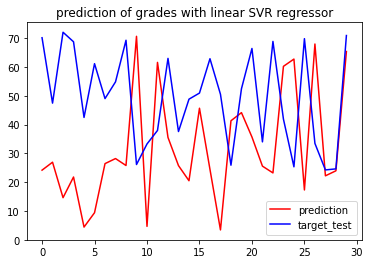

i 0.02131313131313131
j 0.02131313131313131
median error 28.492661370861207
Mean squared error 1106.9824147310553
Mean absolute error 28.95816159986248


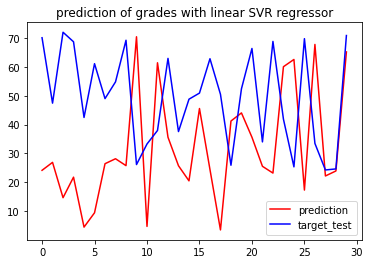

i 0.022727272727272728
j 0.022727272727272728
median error 28.480897438028173
Mean squared error 1106.504574603296
Mean absolute error 28.950792559410434


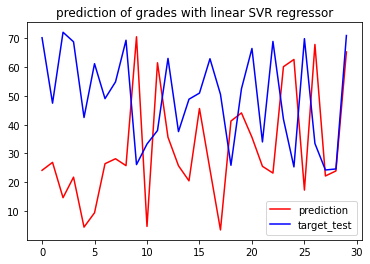

i 0.024141414141414137
j 0.024141414141414137
median error 28.411974791516524
Mean squared error 1099.3887362312046
Mean absolute error 28.83740259193659


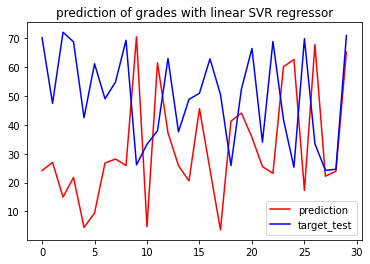

i 0.025555555555555554
j 0.025555555555555554
median error 28.34287610080544
Mean squared error 1092.4557280426613
Mean absolute error 28.723686088611597


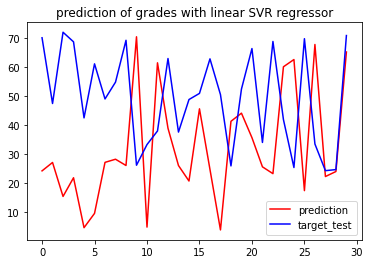

i 0.02696969696969697
j 0.02696969696969697
median error 28.273777410094347
Mean squared error 1085.7263073513045
Mean absolute error 28.6099695852866


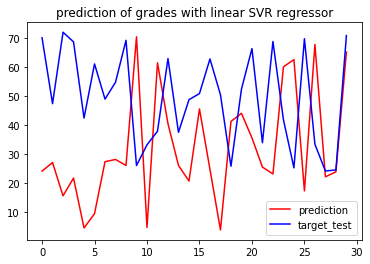

i 0.02838383838383838
j 0.02838383838383838
median error 28.204678719383253
Mean squared error 1079.2004741571322
Mean absolute error 28.4962530819616


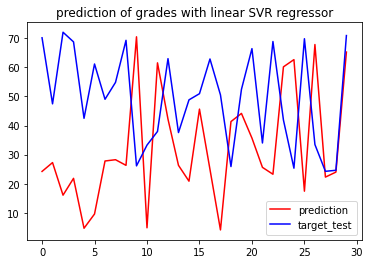

i 0.029797979797979796
j 0.029797979797979796
median error 28.135580028672166
Mean squared error 1072.878228460146
Mean absolute error 28.382536578636607


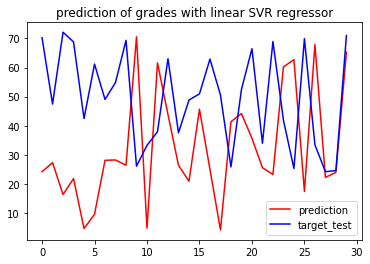

i 0.031212121212121212
j 0.031212121212121212
median error 28.06648133796108
Mean squared error 1066.7595702603444
Mean absolute error 28.268820075311613


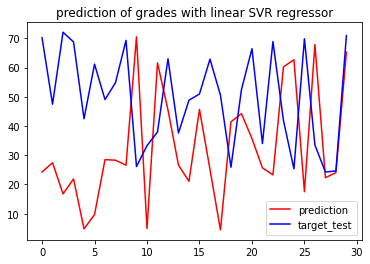

i 0.03262626262626262
j 0.03262626262626262
median error 28.011948093701072
Mean squared error 1062.2623914160129
Mean absolute error 28.183254815623783


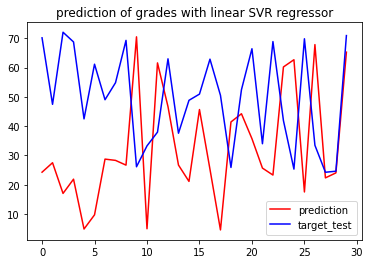

i 0.03404040404040404
j 0.03404040404040404
median error 27.985894247485007
Mean squared error 1061.7309137532075
Mean absolute error 28.169948733660913


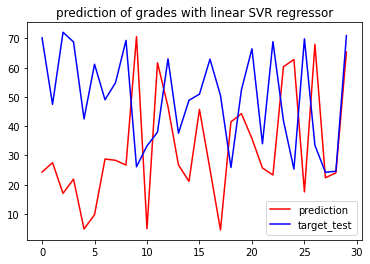

i 0.035454545454545454
j 0.035454545454545454
median error 27.98422815445091
Mean squared error 1061.3372233832645
Mean absolute error 28.169346152456217


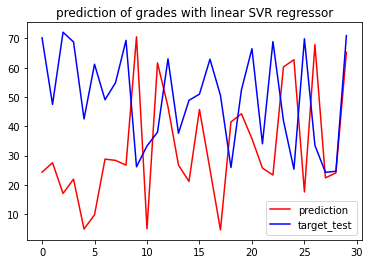

i 0.03686868686868686
j 0.03686868686868686
median error 27.961875607809496
Mean squared error 1060.8152458021152
Mean absolute error 28.15778418194387


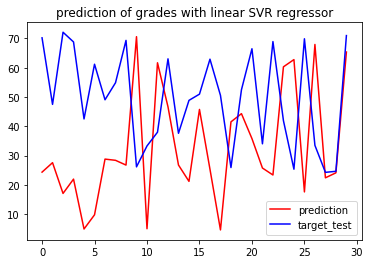

i 0.03828282828282828
j 0.03828282828282828
median error 27.949088719307333
Mean squared error 1060.355219837468
Mean absolute error 28.1513251399265


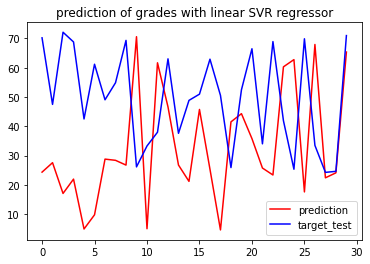

i 0.039696969696969696
j 0.039696969696969696
median error 27.93776796912806
Mean squared error 1059.4739244823934
Mean absolute error 28.139050844609976


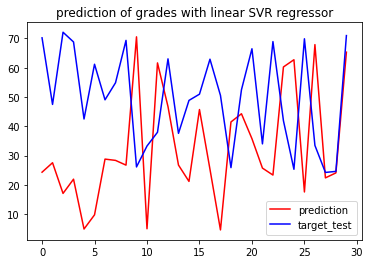

i 0.041111111111111105
j 0.041111111111111105
median error 27.907754194397366
Mean squared error 1058.8856944253514
Mean absolute error 28.123087003140444


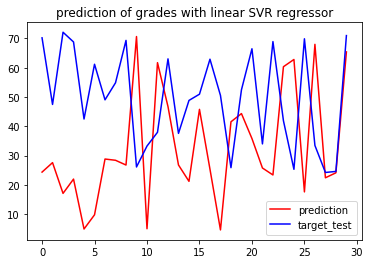

i 0.04252525252525252
j 0.04252525252525252
median error 27.90966377416798
Mean squared error 1058.5132342650347
Mean absolute error 28.12439951446372


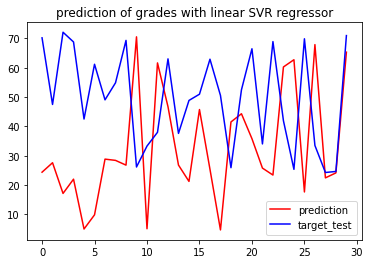

i 0.04393939393939394
j 0.04393939393939394
median error 27.884998295052036
Mean squared error 1057.9404497312364
Mean absolute error 28.11100572520896


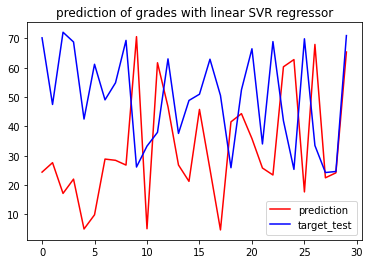

i 0.04535353535353535
j 0.04535353535353535
median error 27.881387470335014
Mean squared error 1057.536599999268
Mean absolute error 28.10941554234669


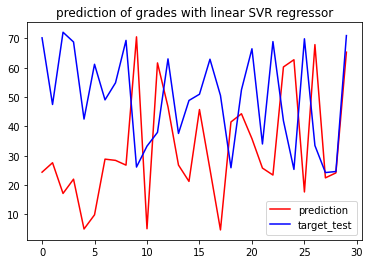

i 0.046767676767676764
j 0.046767676767676764
median error 27.86725169156275
Mean squared error 1057.0488363289558
Mean absolute error 28.101928142962617


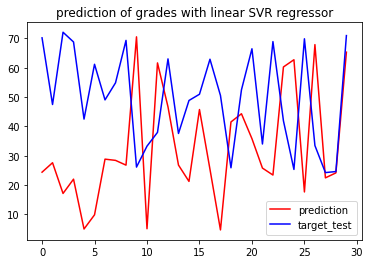

i 0.04818181818181818
j 0.04818181818181818
median error 27.838300232891555
Mean squared error 1056.4878305124723
Mean absolute error 28.08679589538344


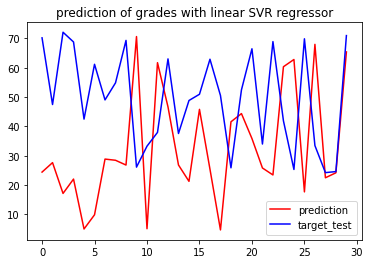

i 0.04959595959595959
j 0.04959595959595959
median error 27.839151979277567
Mean squared error 1056.0907347818609
Mean absolute error 28.08728547666842


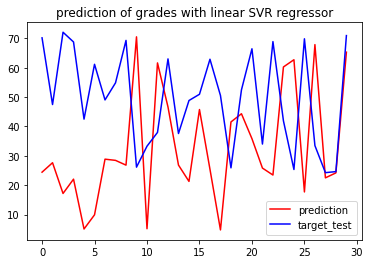

i 0.051010101010101006
j 0.051010101010101006
median error 27.814476788740627
Mean squared error 1055.5409340955791
Mean absolute error 28.074197345120627


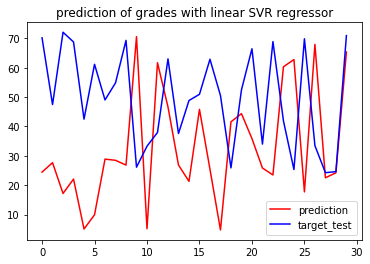

i 0.05242424242424242
j 0.05242424242424242
median error 27.785070109355793
Mean squared error 1052.618233158743
Mean absolute error 28.02242601459638


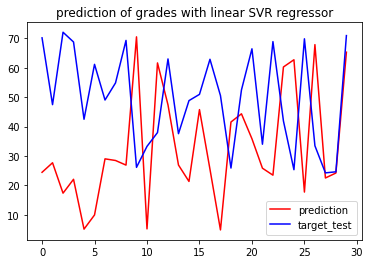

i 0.05383838383838383
j 0.05383838383838383
median error 27.7363393721107
Mean squared error 1048.8529633474193
Mean absolute error 27.948075501345063


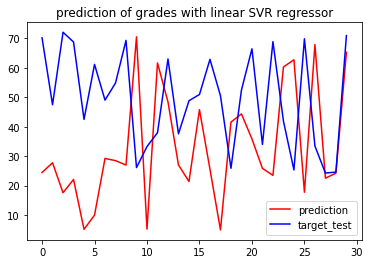

i 0.05525252525252525
j 0.05525252525252525
median error 27.68760863486561
Mean squared error 1045.1683911986383
Mean absolute error 27.873724988093738


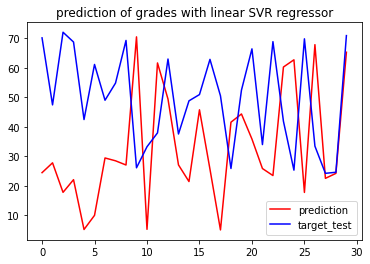

i 0.056666666666666664
j 0.056666666666666664
median error 27.638877897620528
Mean squared error 1041.5645167124014
Mean absolute error 27.799374474842423


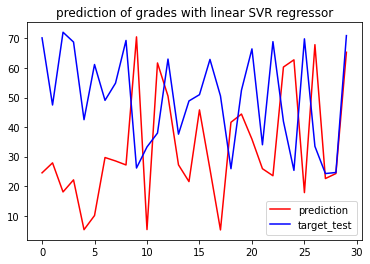

i 0.05808080808080807
j 0.05808080808080807
median error 27.590147160375444
Mean squared error 1038.0413398887067
Mean absolute error 27.7250239615911


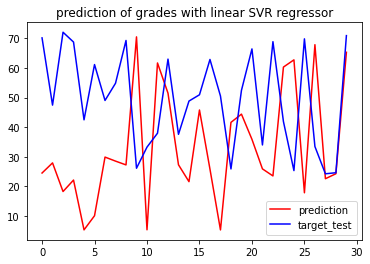

i 0.05949494949494949
j 0.05949494949494949
median error 27.541416423130347
Mean squared error 1034.598860727555
Mean absolute error 27.650673448339766


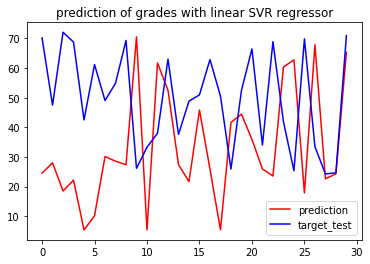

i 0.060909090909090906
j 0.060909090909090906
median error 27.492685685885256
Mean squared error 1031.2370792289462
Mean absolute error 27.57632293508845


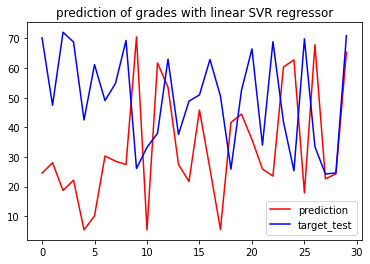

i 0.062323232323232315
j 0.062323232323232315
median error 27.443954948640176
Mean squared error 1027.955995392881
Mean absolute error 27.501972421837124


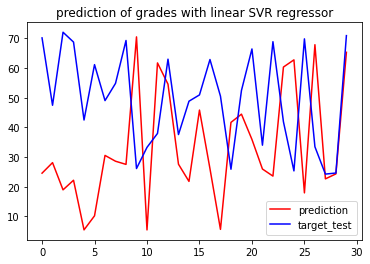

i 0.06373737373737373
j 0.06373737373737373
median error 27.39522421139508
Mean squared error 1024.7556092193583
Mean absolute error 27.427621908585802


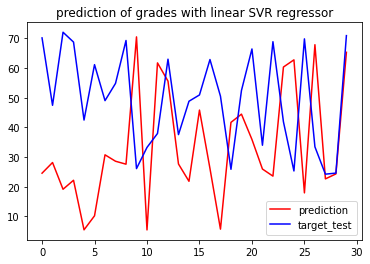

i 0.06515151515151514
j 0.06515151515151514
median error 27.350416213931446
Mean squared error 1021.9307411897679
Mean absolute error 27.360861539593348


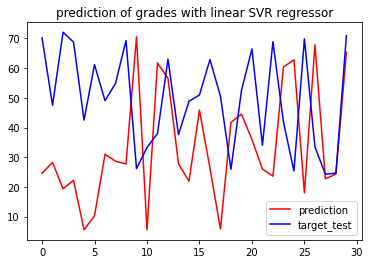

i 0.06656565656565655
j 0.06656565656565655
median error 27.32600849616917
Mean squared error 1021.4112413875188
Mean absolute error 27.348074767285137


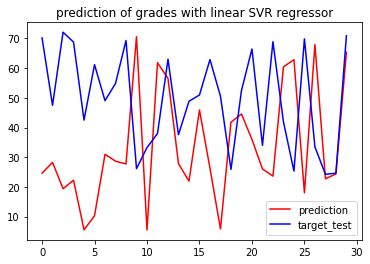

i 0.06797979797979797
j 0.06797979797979797
median error 27.30736451497763
Mean squared error 1020.9359320975474
Mean absolute error 27.33875028443455


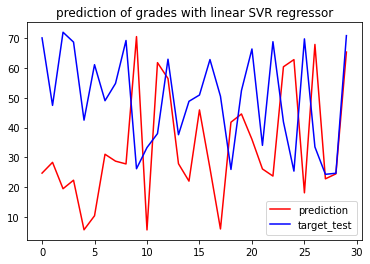

i 0.06939393939393938
j 0.06939393939393938
median error 27.308434536288342
Mean squared error 1020.5122080438188
Mean absolute error 27.33944789353661


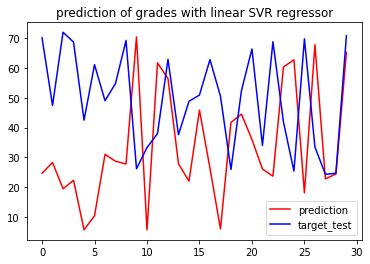

i 0.07080808080808079
j 0.07080808080808079
median error 27.294681049968098
Mean squared error 1020.0579217869292
Mean absolute error 27.33277517567561


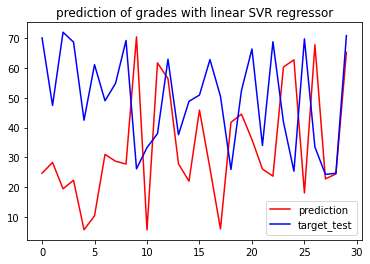

i 0.07222222222222222
j 0.07222222222222222
median error 27.2805965056618
Mean squared error 1019.5789076303357
Mean absolute error 27.325461890758884


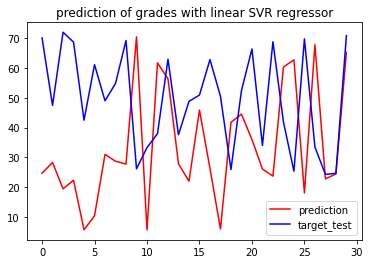

i 0.07363636363636362
j 0.07363636363636362
median error 27.253986830918645
Mean squared error 1019.065292671998
Mean absolute error 27.311723765854797


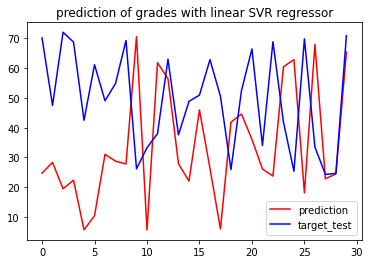

i 0.07505050505050503
j 0.07505050505050503
median error 27.24284432368964
Mean squared error 1018.6007601357745
Mean absolute error 27.306034053309514


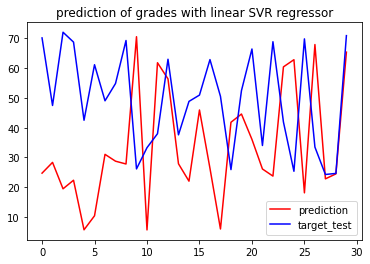

i 0.07646464646464644
j 0.07646464646464644
median error 27.23878537211612
Mean squared error 1018.1765481206293
Mean absolute error 27.304378232000307


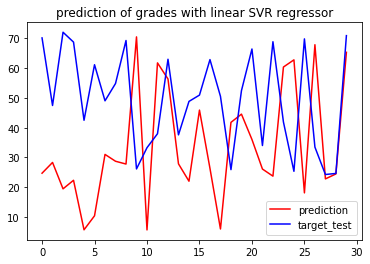

i 0.07787878787878787
j 0.07787878787878787
median error 27.21273519533004
Mean squared error 1017.6629377812571
Mean absolute error 27.290863525694718


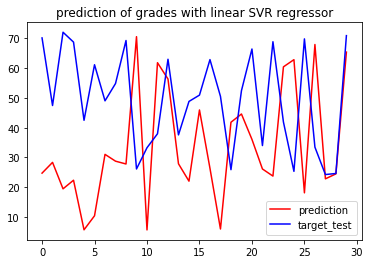

i 0.07929292929292928
j 0.07929292929292928
median error 27.198811670136127
Mean squared error 1017.1957178473774
Mean absolute error 27.283826296438995


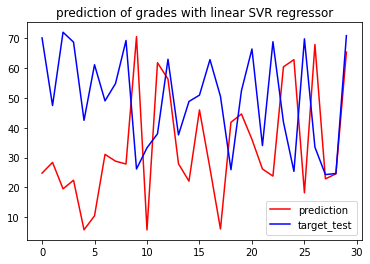

i 0.08070707070707069
j 0.08070707070707069
median error 27.187127327954315
Mean squared error 1016.7311285636824
Mean absolute error 27.277874042744248


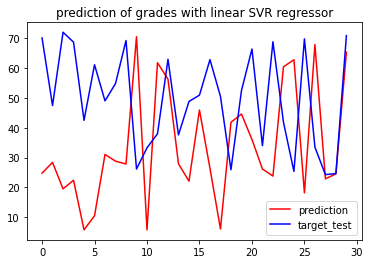

i 0.08212121212121211
j 0.08212121212121211
median error 27.173335454963087
Mean squared error 1016.2644188796527
Mean absolute error 27.270900604354082


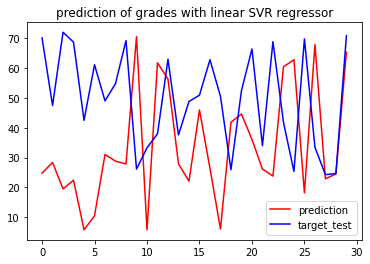

i 0.08353535353535352
j 0.08353535353535352
median error 27.168838027295735
Mean squared error 1015.8239249306989
Mean absolute error 27.268731618063164


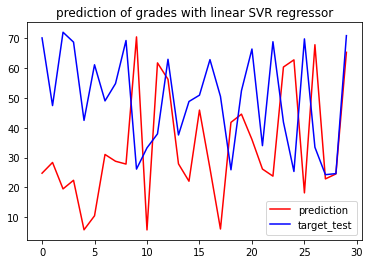

i 0.08494949494949493
j 0.08494949494949493
median error 27.15503936627737
Mean squared error 1015.3684769515006
Mean absolute error 27.261971491275066


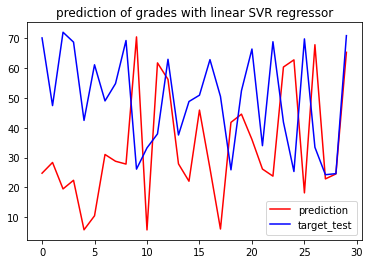

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.08636363636363635
j 0.08636363636363635
median error 27.141160870148717
Mean squared error 1014.9072236295744
Mean absolute error 27.255056890818626


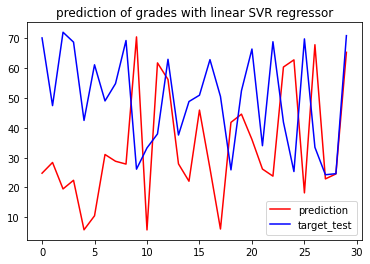

i 0.08777777777777776
j 0.08777777777777776
median error 27.127259677643707
Mean squared error 1014.4444790716184
Mean absolute error 27.248098374940714


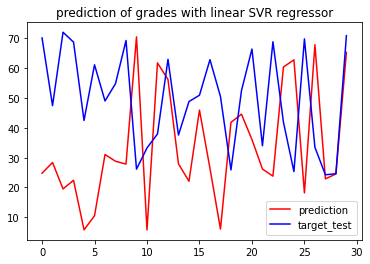

i 0.08919191919191917
j 0.08919191919191917
median error 27.11307871175694
Mean squared error 1013.9608016425464
Mean absolute error 27.240598523046263


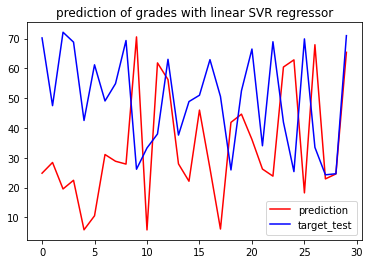

i 0.09060606060606059
j 0.09060606060606059
median error 27.087374423124643
Mean squared error 1013.4658428188842
Mean absolute error 27.227504697866078


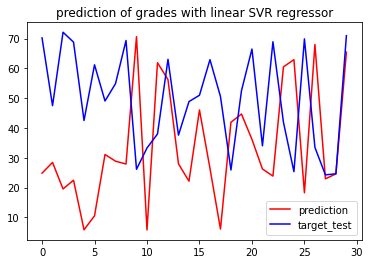

i 0.092020202020202
j 0.092020202020202
median error 27.069418308741618
Mean squared error 1012.9975544935216
Mean absolute error 27.21851351455929


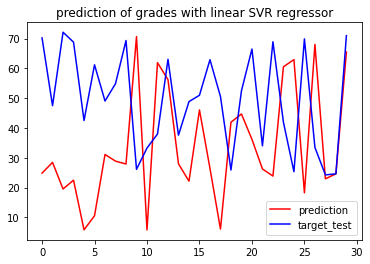

i 0.09343434343434341
j 0.09343434343434341
median error 27.045349814599593
Mean squared error 1011.6412865635043
Mean absolute error 27.189530534078397


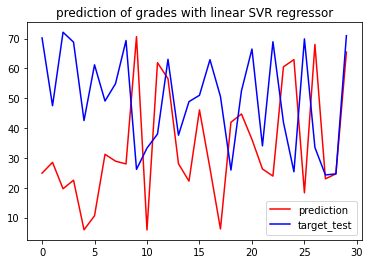

i 0.09484848484848483
j 0.09484848484848483
median error 27.03441401158443
Mean squared error 1011.1650533318885
Mean absolute error 27.184023534083646


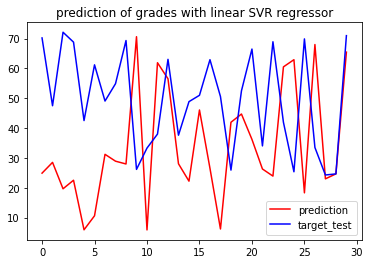

i 0.09626262626262624
j 0.09626262626262624
median error 27.031336819715833
Mean squared error 1010.7300107121303
Mean absolute error 27.182130534289225


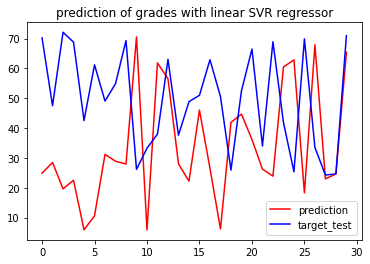

i 0.09767676767676765
j 0.09767676767676765
median error 27.002329599760127
Mean squared error 1010.2063229958367
Mean absolute error 27.16950081729474


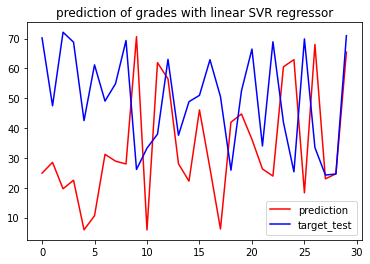

i 0.09909090909090908
j 0.09909090909090908
median error 27.00300601526813
Mean squared error 1009.7677101971603
Mean absolute error 27.168600766845497


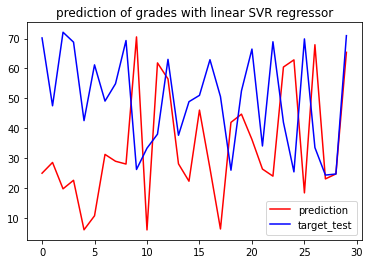

i 0.10050505050505049
j 0.10050505050505049
median error 26.982448260065848
Mean squared error 1009.2560232862915
Mean absolute error 27.159170594228975


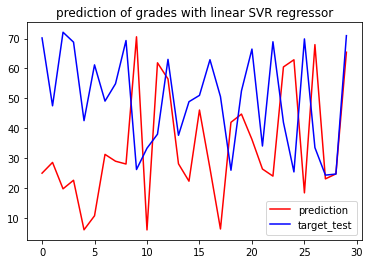

i 0.1019191919191919
j 0.1019191919191919
median error 26.9594811123873
Mean squared error 1008.7735233093485
Mean absolute error 27.149530099287638


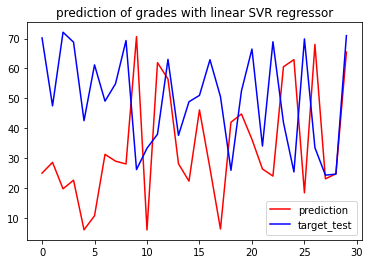

i 0.10333333333333332
j 0.10333333333333332
median error 26.96097460204402
Mean squared error 1008.3607128419519
Mean absolute error 27.14946753895314


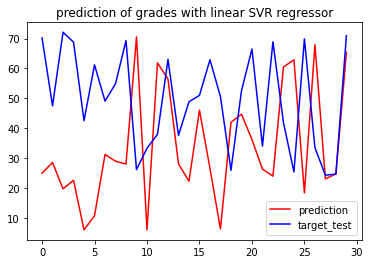

i 0.10474747474747473
j 0.10474747474747473
median error 26.94663962025369
Mean squared error 1007.8678276042984
Mean absolute error 27.14246421939972


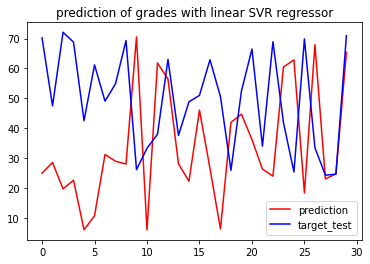

i 0.10616161616161614
j 0.10616161616161614
median error 26.923472136380838
Mean squared error 1007.3456931002688
Mean absolute error 27.131909167315357


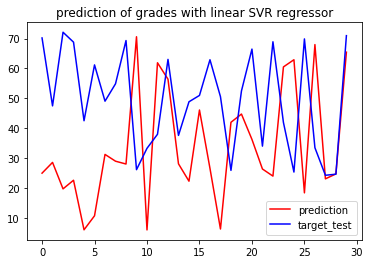

i 0.10757575757575756
j 0.10757575757575756
median error 26.902079262647064
Mean squared error 1006.8662220866277
Mean absolute error 27.12280953073834


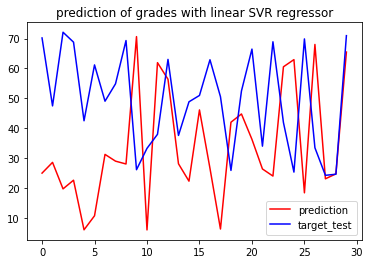

i 0.10898989898989897
j 0.10898989898989897
median error 26.89359862344901
Mean squared error 1006.3919627391967
Mean absolute error 27.118146028084496


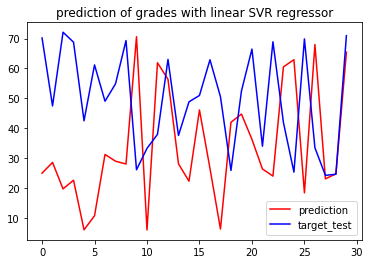

i 0.11040404040404038
j 0.11040404040404038
median error 26.883641036312387
Mean squared error 1005.9175247631716
Mean absolute error 27.112975104438966


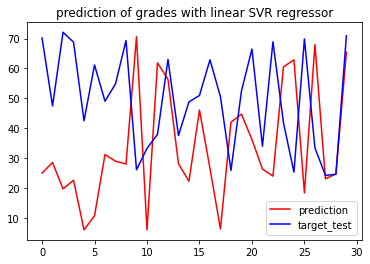

i 0.1118181818181818
j 0.1118181818181818
median error 26.87577688905855
Mean squared error 1005.4675169911135
Mean absolute error 27.10901330078308


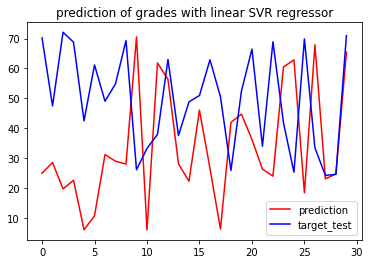

i 0.11323232323232321
j 0.11323232323232321
median error 26.861688346404947
Mean squared error 1004.9944020464665
Mean absolute error 27.102485055331506


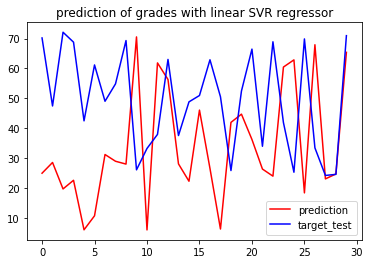

i 0.11464646464646462
j 0.11464646464646462
median error 26.838959378383606
Mean squared error 1004.4892028978944
Mean absolute error 27.09237458141495


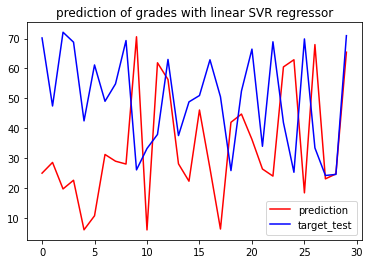

i 0.11606060606060604
j 0.11606060606060604
median error 26.815426917139252
Mean squared error 1004.0121958653108
Mean absolute error 27.082539867054845


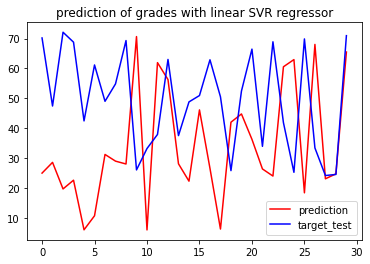

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.11747474747474745
j 0.11747474747474745
median error 26.824403388088456
Mean squared error 1003.9584304438429
Mean absolute error 27.09277181176296


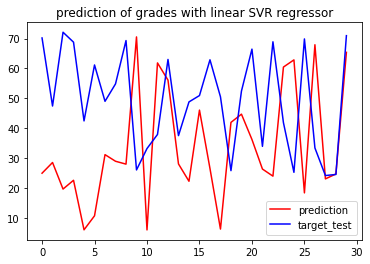

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.11888888888888886
j 0.11888888888888886
median error 26.464146648253475
Mean squared error 1003.6220069806383
Mean absolute error 26.94800365864314


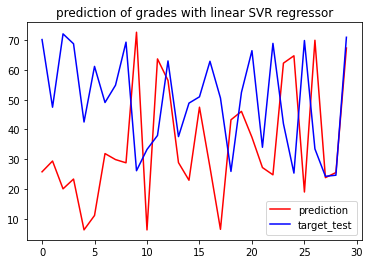

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.12030303030303029
j 0.12030303030303029
median error 26.45425167076163
Mean squared error 1003.4648030825898
Mean absolute error 26.949464457208517


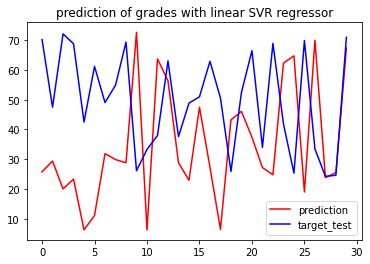

i 0.1217171717171717
j 0.1217171717171717
median error 26.760410949191627
Mean squared error 1002.1141624839729
Mean absolute error 27.056638993278565


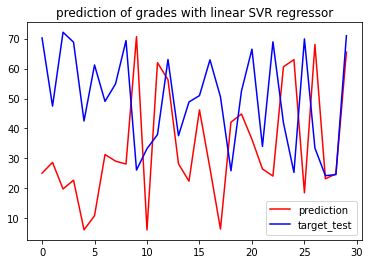

i 0.1231313131313131
j 0.1231313131313131
median error 26.743102131808854
Mean squared error 1001.6404382817377
Mean absolute error 27.048942477197286


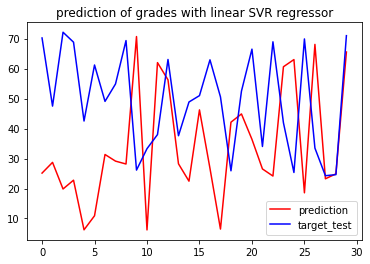

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.12454545454545453
j 0.12454545454545453
median error 26.755798832752067
Mean squared error 1001.7353817125045
Mean absolute error 27.063567917438608


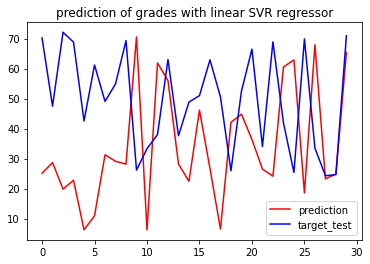

i 0.12595959595959594
j 0.12595959595959594
median error 26.73465991445221
Mean squared error 1000.7287726541264
Mean absolute error 27.043284478482715


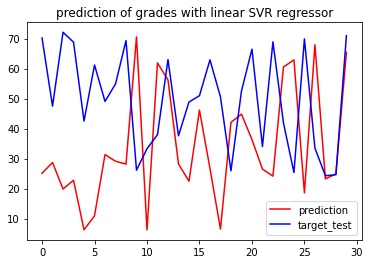

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.12737373737373736
j 0.12737373737373736
median error 26.724814465680097
Mean squared error 1000.5836891469967
Mean absolute error 27.045173648426285


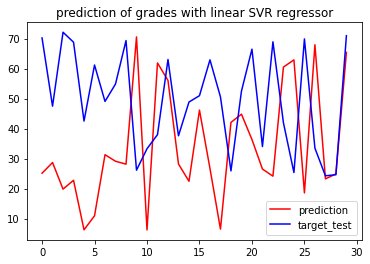

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.12878787878787878
j 0.12878787878787878
median error 26.702959691470333
Mean squared error 999.7423146475466
Mean absolute error 27.02813984067857


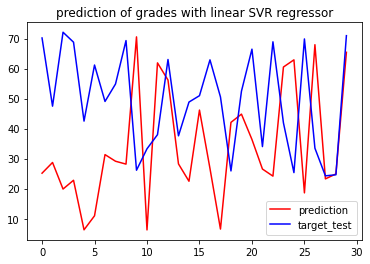

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.13020202020202018
j 0.13020202020202018
median error 26.357431863824864
Mean squared error 1000.1363374192969
Mean absolute error 26.902510823761013


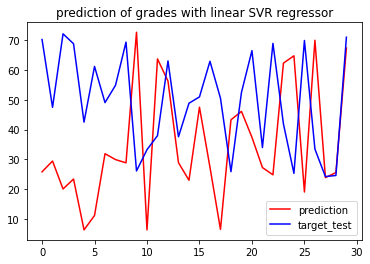

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.1316161616161616
j 0.1316161616161616
median error 26.364380429198185
Mean squared error 999.7925306048832
Mean absolute error 26.908309462188093


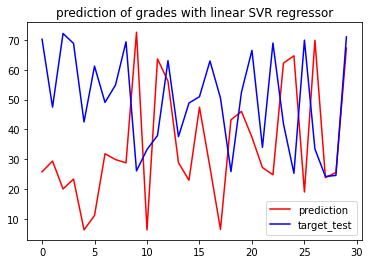

i 0.13303030303030303
j 0.13303030303030303
median error 26.648245126505707
Mean squared error 998.327985949037
Mean absolute error 27.004104126485167


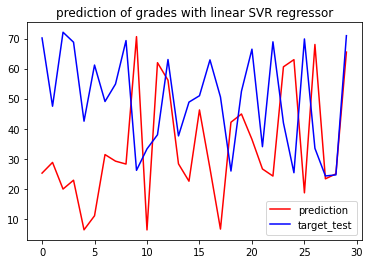

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.13444444444444442
j 0.13444444444444442
median error 26.700501287033543
Mean squared error 998.2715418210973
Mean absolute error 27.028853174276716


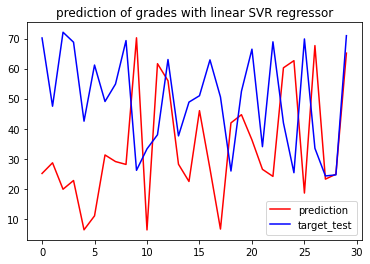

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.13585858585858585
j 0.13585858585858585
median error 26.299017569270436
Mean squared error 998.0050041531251
Mean absolute error 26.869840489001195


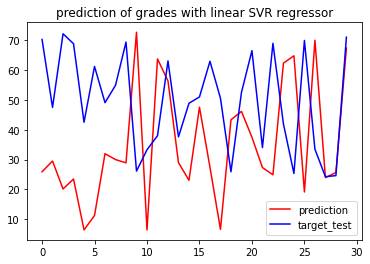

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.13727272727272727
j 0.13727272727272727
median error 26.380255173962716
Mean squared error 997.5160607021375
Mean absolute error 26.906752031383608


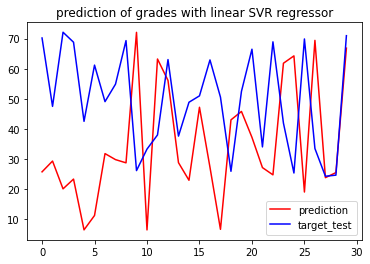

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.13868686868686866
j 0.13868686868686866
median error 26.66257119523384
Mean squared error 997.0810307631772
Mean absolute error 27.01541299005906


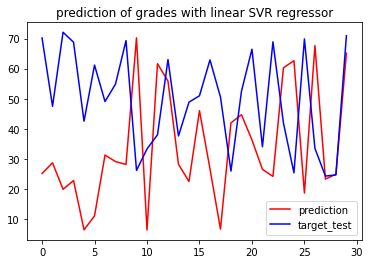

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.1401010101010101
j 0.1401010101010101
median error 26.64822051450153
Mean squared error 996.5519661352804
Mean absolute error 27.007525796747327


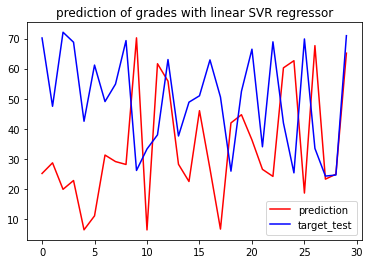

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.1415151515151515
j 0.1415151515151515
median error 26.395935951431994
Mean squared error 995.8460630163906
Mean absolute error 26.90685095780806


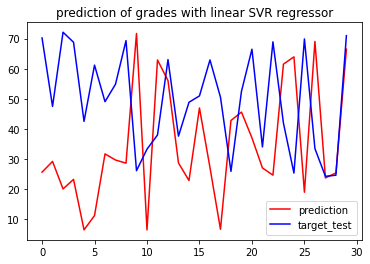

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.1429292929292929
j 0.1429292929292929
median error 26.236777819958647
Mean squared error 996.1861611490051
Mean absolute error 26.850213053930254


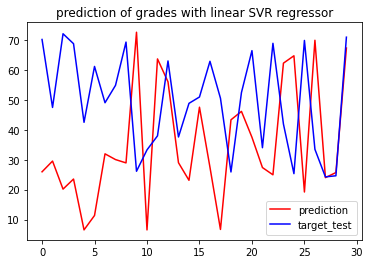

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.14434343434343433
j 0.14434343434343433
median error 26.408072866667773
Mean squared error 994.7861735455283
Mean absolute error 26.90757308115338


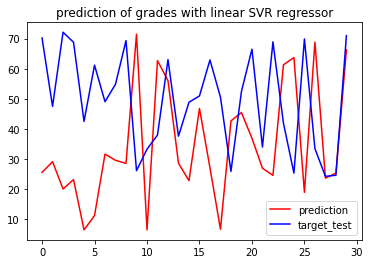

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.14575757575757575
j 0.14575757575757575
median error 26.215324329576283
Mean squared error 994.6773659546162
Mean absolute error 26.82240485407723


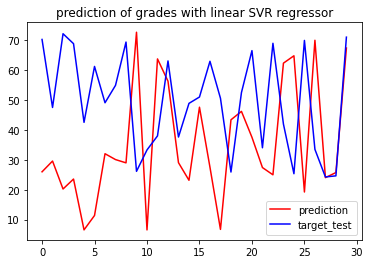

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.14717171717171715
j 0.14717171717171715
median error 26.58247991265857
Mean squared error 994.3781892929595
Mean absolute error 26.98012563353395


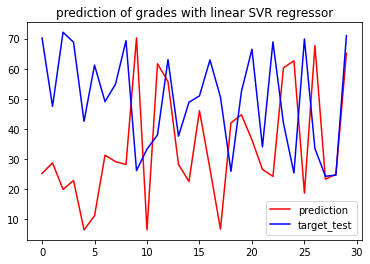

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.14858585858585857
j 0.14858585858585857
median error 26.568174273517172
Mean squared error 993.8482624155987
Mean absolute error 26.97214099858116


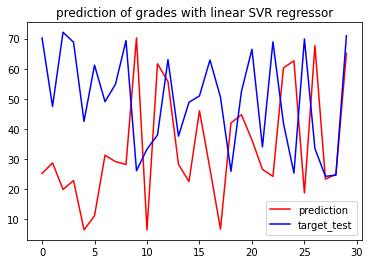

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.15
j 0.15
median error 26.23368024987599
Mean squared error 993.4572517784383
Mean absolute error 26.840655999668922


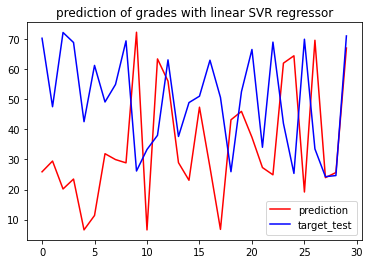

In [ ]:
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
for i, j in zip(np.linspace(0.01,0.15,100),np.linspace(0.01,0.15,100)):
  svm_reg = LinearSVR(epsilon=i,C =j)
  svm_reg.fit(train_set, target_train)
  pred = svm_reg.predict(test_set)
  print("i",i)
  print("j",j)
  print("median error",median_absolute_error(target_tests, pred))
  print("Mean squared error",mean_squared_error(target_tests, pred))
  print("Mean absolute error",mean_absolute_error(target_tests, pred))
  plt.title('prediction of grades with linear SVR regressor')
  plt.plot(pred,color = 'red', label = 'prediction')
  plt.plot(target_tests,color = 'blue', label = 'target_test')
  plt.legend()
  plt.show()